<a href="https://colab.research.google.com/github/keller3games/test/blob/main/ModellSpeichern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelle speichern und laden


## Modell kontruieren und trainieren:

Zunächst konstruieren und trainieren wir ein einfaches Modell zur Zeichenerkennung – Detaillierte Diksussion siehe [hier](https://colab.research.google.com/drive/1CAOf4_om07EnqskF3HzzRAuKFrogUONS?usp=sharing))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

from keras.utils import to_categorical

NUM_CLASSES = 10

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

from keras.layers import Input, Flatten, Dense, Softmax
from keras.models import Model

input_layer = Input(shape=(28,28))
x = Flatten()(input_layer)
x = Dense(units=500, activation='sigmoid')(x)
x = Dense(units=100, activation='sigmoid')(x)
output_layer = Dense(units=NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

from keras.optimizers import Adam

opt = Adam(lr=0.0005)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, 
          y_train,
          batch_size=32,
          epochs=10,
          shuffle=True,
          validation_data = (x_test, y_test))

11493376/11490434 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8431 - accuracy: 0.7855 - val_loss: 0.2413 - val_accuracy: 0.9302
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2244 - accuracy: 0.9346 - val_loss: 0.1739 - val_accuracy: 0.9488
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1544 - accuracy: 0.9548 - val_loss: 0.1350 - val_accuracy: 0.9601
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1170 - accuracy: 0.9646 - val_loss: 0.1070 - val_accuracy: 0.9674
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0897 - accuracy: 0.9739 - val_loss: 0.0891 - val_accuracy: 0.9716
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0682 - accuracy: 0.9798 - val_loss: 0.0848 - val_accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step

## Modell testen


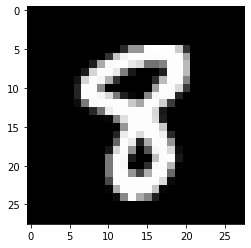

8


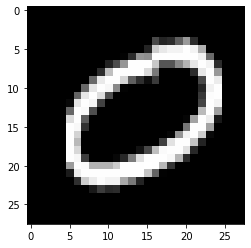

0


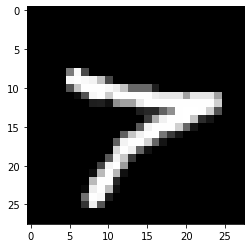

7


In [ ]:
CLASSES = np.arange(10)

indices = np.random.choice(range(10000), 3)
arrays = x_test[indices]

predictions = model.predict(arrays)

predictions = CLASSES[np.argmax(predictions, axis = 1)]

for idx, arr in enumerate(arrays):
  plt.imshow(arrays[idx], cmap="gray")
  plt.show()
  print(predictions[idx])

## Modell speichern:

Das Modell hat eine `save()` Methode:

In [ ]:
model.save('mein_modell.h5')

## Modell laden und geladenes Modell testen:

In [ ]:
from tensorflow.keras.models import load_model
model_geladen = load_model('mein_modell.h5')

# Das geladene Modell funktioniert:
predictions = model_geladen.predict(arrays)

predictions = CLASSES[np.argmax(predictions, axis = 1)]

for idx, arr in enumerate(arrays):
  plt.imshow(arrays[idx], cmap="gray")
  plt.show()
  print(predictions[idx])

Selbstverständlich kann auch das geladene Modell weiter trainiert werden:

In [ ]:
model_geladen.fit(x_train, 
                  y_train,
                  batch_size=32,
                  epochs=10,
                  shuffle=True,
                  validation_data = (x_test, y_test))